In [1]:
# from : https://github.com/corazzon/OpenDataWrangling/blob/master/park.ipynb
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
import re

# 지도 표현을 위해
import folium

In [12]:
park = pd.read_csv('../data/city_park.csv')
park.shape

(16096, 19)

In [6]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구


In [7]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 19 columns):
관리번호            16096 non-null object
공원명             16096 non-null object
공원구분            16096 non-null object
소재지도로명주소        8321 non-null object
소재지지번주소         15213 non-null object
위도              16096 non-null float64
경도              16096 non-null float64
공원면적            16096 non-null float64
공원보유시설(운동시설)    4164 non-null object
공원보유시설(유희시설)    6085 non-null object
공원보유시설(편익시설)    4344 non-null object
공원보유시설(교양시설)    914 non-null object
공원보유시설(기타시설)    2503 non-null object
지정고시일           13512 non-null object
관리기관명           15381 non-null object
전화번호            14966 non-null object
데이터기준일자         16096 non-null object
제공기관코드          16096 non-null object
제공기관명           16096 non-null object
dtypes: float64(3), object(16)
memory usage: 2.3+ MB


In [8]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         7775
소재지지번주소           883
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    11932
공원보유시설(유희시설)    10011
공원보유시설(편익시설)    11752
공원보유시설(교양시설)    15182
공원보유시설(기타시설)    13593
지정고시일            2584
관리기관명             715
전화번호             1130
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

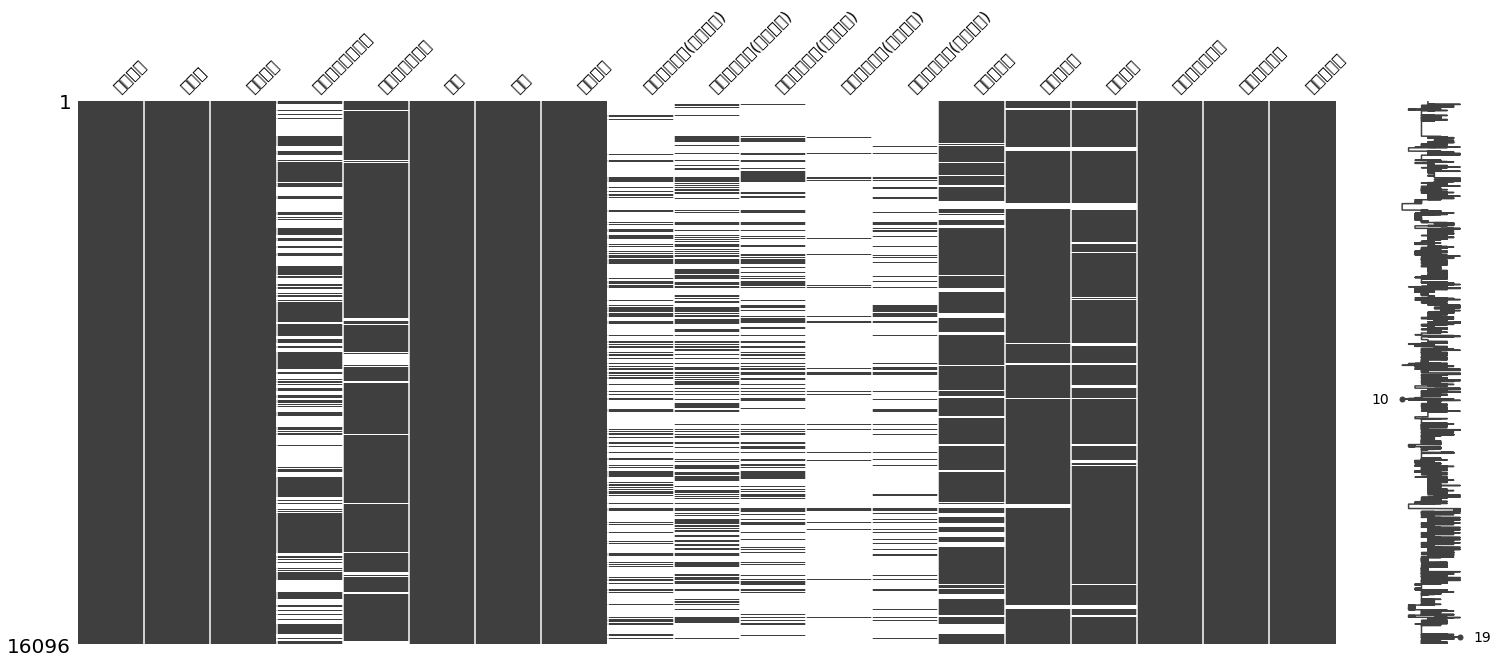

In [9]:
import missingno as msno

msno.matrix(park)

In [13]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.2
설치 위치:  C:\Users\yoonani\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\yoonani\.matplotlib
캐시 위치:  C:\Users\yoonani\.matplotlib


In [14]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\yoonani\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [15]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

NameError: name 'fm' is not defined